<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/Food_Classification_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_USERNAME"]="palak27"
os.environ["KAGGLE_KEY"] = "a9c6366cd0407ac517d026e146957691"
!kaggle datasets download utkarshsaxenadn/fast-food-classification-dataset

100% 819M/821M [00:45<00:00, 21.2MB/s]
100% 821M/821M [00:45<00:00, 18.9MB/s]


In [2]:
from IPython.display import clear_output
!unzip fast-food-classification-dataset.zip
clear_output()

In [3]:
trainpath="dataset/Train"
testpath="dataset/Test"
validpath="dataset/Valid"

In [18]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

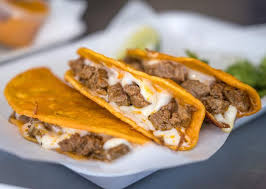

In [6]:
imgpath="dataset/Train/Taco/Taco-Train (1).jpeg"
Image.open(imgpath)

In [7]:
img=cv2.imread(imgpath)
img.shape

(189, 266, 3)

In [9]:
class_names=os.listdir(trainpath)
len(class_names)

10

In [13]:
#Image augmentation
img_data=ImageDataGenerator(rescale=1/255.,horizontal_flip=True)

x_train=img_data.flow_from_directory(trainpath, target_size=(224,224),
                                             batch_size=32, class_mode="sparse")
x_val=img_data.flow_from_directory(validpath, target_size=(224,224),
                                             batch_size=32, class_mode="sparse")
x_test=img_data.flow_from_directory(testpath, target_size=(224,224),
                                             batch_size=32, class_mode="sparse")

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [11]:
from tensorflow.keras.applications import InceptionV3,ResNetRS101,VGG19

In [12]:
resnet=ResNetRS101()

256017816/256017816 [==============================] - 19s 0us/step


In [14]:
resnet.summary()

Model: "resnet-rs-101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 226, 226, 3)  0          ['normalization[0][0]

In [16]:
resnet.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [17]:
x=resnet.output
#Adding hidden layer as we dont have 1000 output classes
x=Dense(1024,activation="relu")(x)
output=Dense(10,activation="softmax")(x)

In [21]:
model=Model(inputs=resnet.input,outputs=output)

In [22]:
from tensorflow.python.ops import histogram_ops
from datetime import datetime as dt
def train_model():
  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  logdir = os.path.join("logs", dt.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(x_train, validation_data=x_val, epochs=10, callbacks=[tensorboard_callback])

In [23]:
train_model()

Epoch 1/10
 31/469 [>.............................] - ETA: 6:36 - loss: 2.2929 - accuracy: 0.1474

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 [==============================] - 492s 823ms/step - loss: 2.2404 - accuracy: 0.1551 - val_loss: 2.3628 - val_accuracy: 0.0926
Epoch 2/10
469/469 [==============================] - 376s 801ms/step - loss: 2.1236 - accuracy: 0.2183 - val_loss: 2.6302 - val_accuracy: 0.0931
Epoch 3/10
469/469 [==============================] - 377s 803ms/step - loss: 1.9578 - accuracy: 0.2949 - val_loss: 2.6421 - val_accuracy: 0.1840
Epoch 4/10
469/469 [==============================] - 376s 803ms/step - loss: 1.8061 - accuracy: 0.3519 - val_loss: 3.3627 - val_accuracy: 0.1143
Epoch 5/10
469/469 [==============================] - 376s 801ms/step - loss: 1.7494 - accuracy: 0.3747 - val_loss: 3.6003 - val_accuracy: 0.1069
Epoch 6/10
469/469 [==============================] - 374s 797ms/step - loss: 1.8633 - accuracy: 0.3300 - val_loss: 1.7996 - val_accuracy: 0.3614
Epoch 7/10
469/469 [==============================] - 375s 799ms/step - loss: 1.6345 - accuracy: 0.4319 - val_loss: 1.6109 - val_accura